In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import status
from sklearn.preprocessing import LabelEncoder

In [25]:
pd.read_excel("data/pisos_rm.xlsx")

,Direccion,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,Publi
0,"San Miguel, Cuarta Avenida 1447",99245550,2850.000,49,49,2,1,0,19/12/2022
1,"Estación Central, Avenida Padre Alberto Hurtado",75000000,2153.749,62,62,3,2,0,19/12/2022
2,"Independencia, Inglaterra",68949540,1980.000,39,39,2,1,0,19/12/2022
3,"San Joaquín, Sta. Rosa 2648",70342460,2020.000,46,46,2,1,0,19/12/2022
4,"Las Condes, Fray Luis de León",971561700,27900.000,340,340,4,3,3,19/12/2022
...,...,...,...,...,...,...,...,...,...
9622,"Independencia, Gomero",69646000,2000.000,70,70,1,1,0,04/12/2022
9623,"Las Condes, Cristobal colon / felix de amesti",390017600,11200.000,147,147,4,3,3,04/12/2022
9624,"Santiago, Vicuña Mackenna / Metro Irarrázaval ...",73128300,2100.000,33,33,1,1,0,04/12/2022
9625,"Pudahuel, San pablo ag/el salistre",80000000,2297.332,65,65,3,2,1,04/12/2022


In [26]:
df= pd.read_excel("data/pisos_rm.xlsx")

##  Verifcamos que en nuestro dataset no hayan NaN, identificar la naturaleza de los valores 0 y tipo de datos por feature

In [27]:
status(df).sort_values(by="q_nan",ascending=False)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Direccion,0,0.0,0,0.000000,6993,object
1,Precio,0,0.0,0,0.000000,2138,int64
2,UF,0,0.0,0,0.000000,2133,float64
3,m2_Construidos,0,0.0,118,0.012257,413,int64
4,m2_totales,0,0.0,118,0.012257,413,int64
5,Habitaciones,0,0.0,0,0.000000,15,int64
6,Banos,0,0.0,0,0.000000,12,int64
7,Estacionamientos,0,0.0,4969,0.516152,55,int64
8,Publi,0,0.0,0,0.000000,71,object


In [554]:
# hay que eliminar todos aquellos pisos con metros cuadrados totales igual a 0 

In [28]:
df.isnull().sum().sort_values(ascending=False)

Direccion           0
Precio              0
UF                  0
m2_Construidos      0
m2_totales          0
Habitaciones        0
Banos               0
Estacionamientos    0
Publi               0
dtype: int64

## Identificar si hay datos duplicados, si existen deben ser eliminados

In [29]:
df.duplicated().sum()

0

 ## Convertimos los valores de UF en entero (Target)
 

In [30]:
df["UF"]=df["UF"].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9627 entries, 0 to 9626
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Direccion         9627 non-null   object
 1   Precio            9627 non-null   int64 
 2   UF                9627 non-null   int32 
 3   m2_Construidos    9627 non-null   int64 
 4   m2_totales        9627 non-null   int64 
 5   Habitaciones      9627 non-null   int64 
 6   Banos             9627 non-null   int64 
 7   Estacionamientos  9627 non-null   int64 
 8   Publi             9627 non-null   object
dtypes: int32(1), int64(6), object(2)
memory usage: 639.4+ KB


## Vamos a identificar el nivel de Correlacion entre nuestro target y las demas Variables 

C:\Users\diazb\AppData\Local\Temp\ipykernel_7560\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

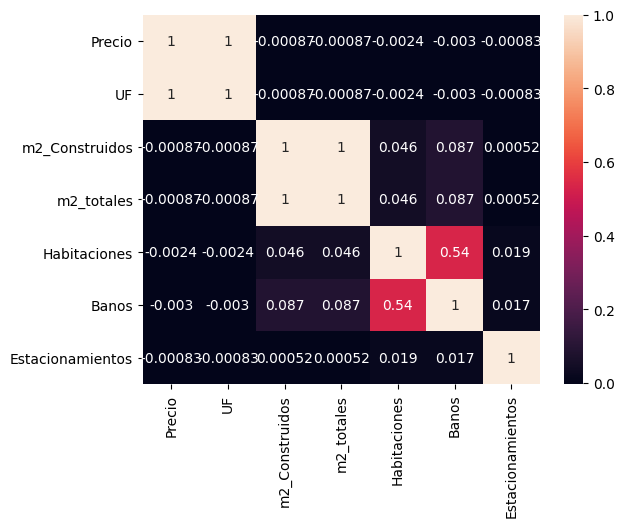

In [8]:
sns.heatmap(df.corr(), annot=True)

In [560]:
# de aqui se desprende que debemos eliminar la columna metros cuadratos construidos debido a su alta correlacion a m2 totales (tienen los mismos valores)

## Vamos a visualizar la dispresion de los datos 

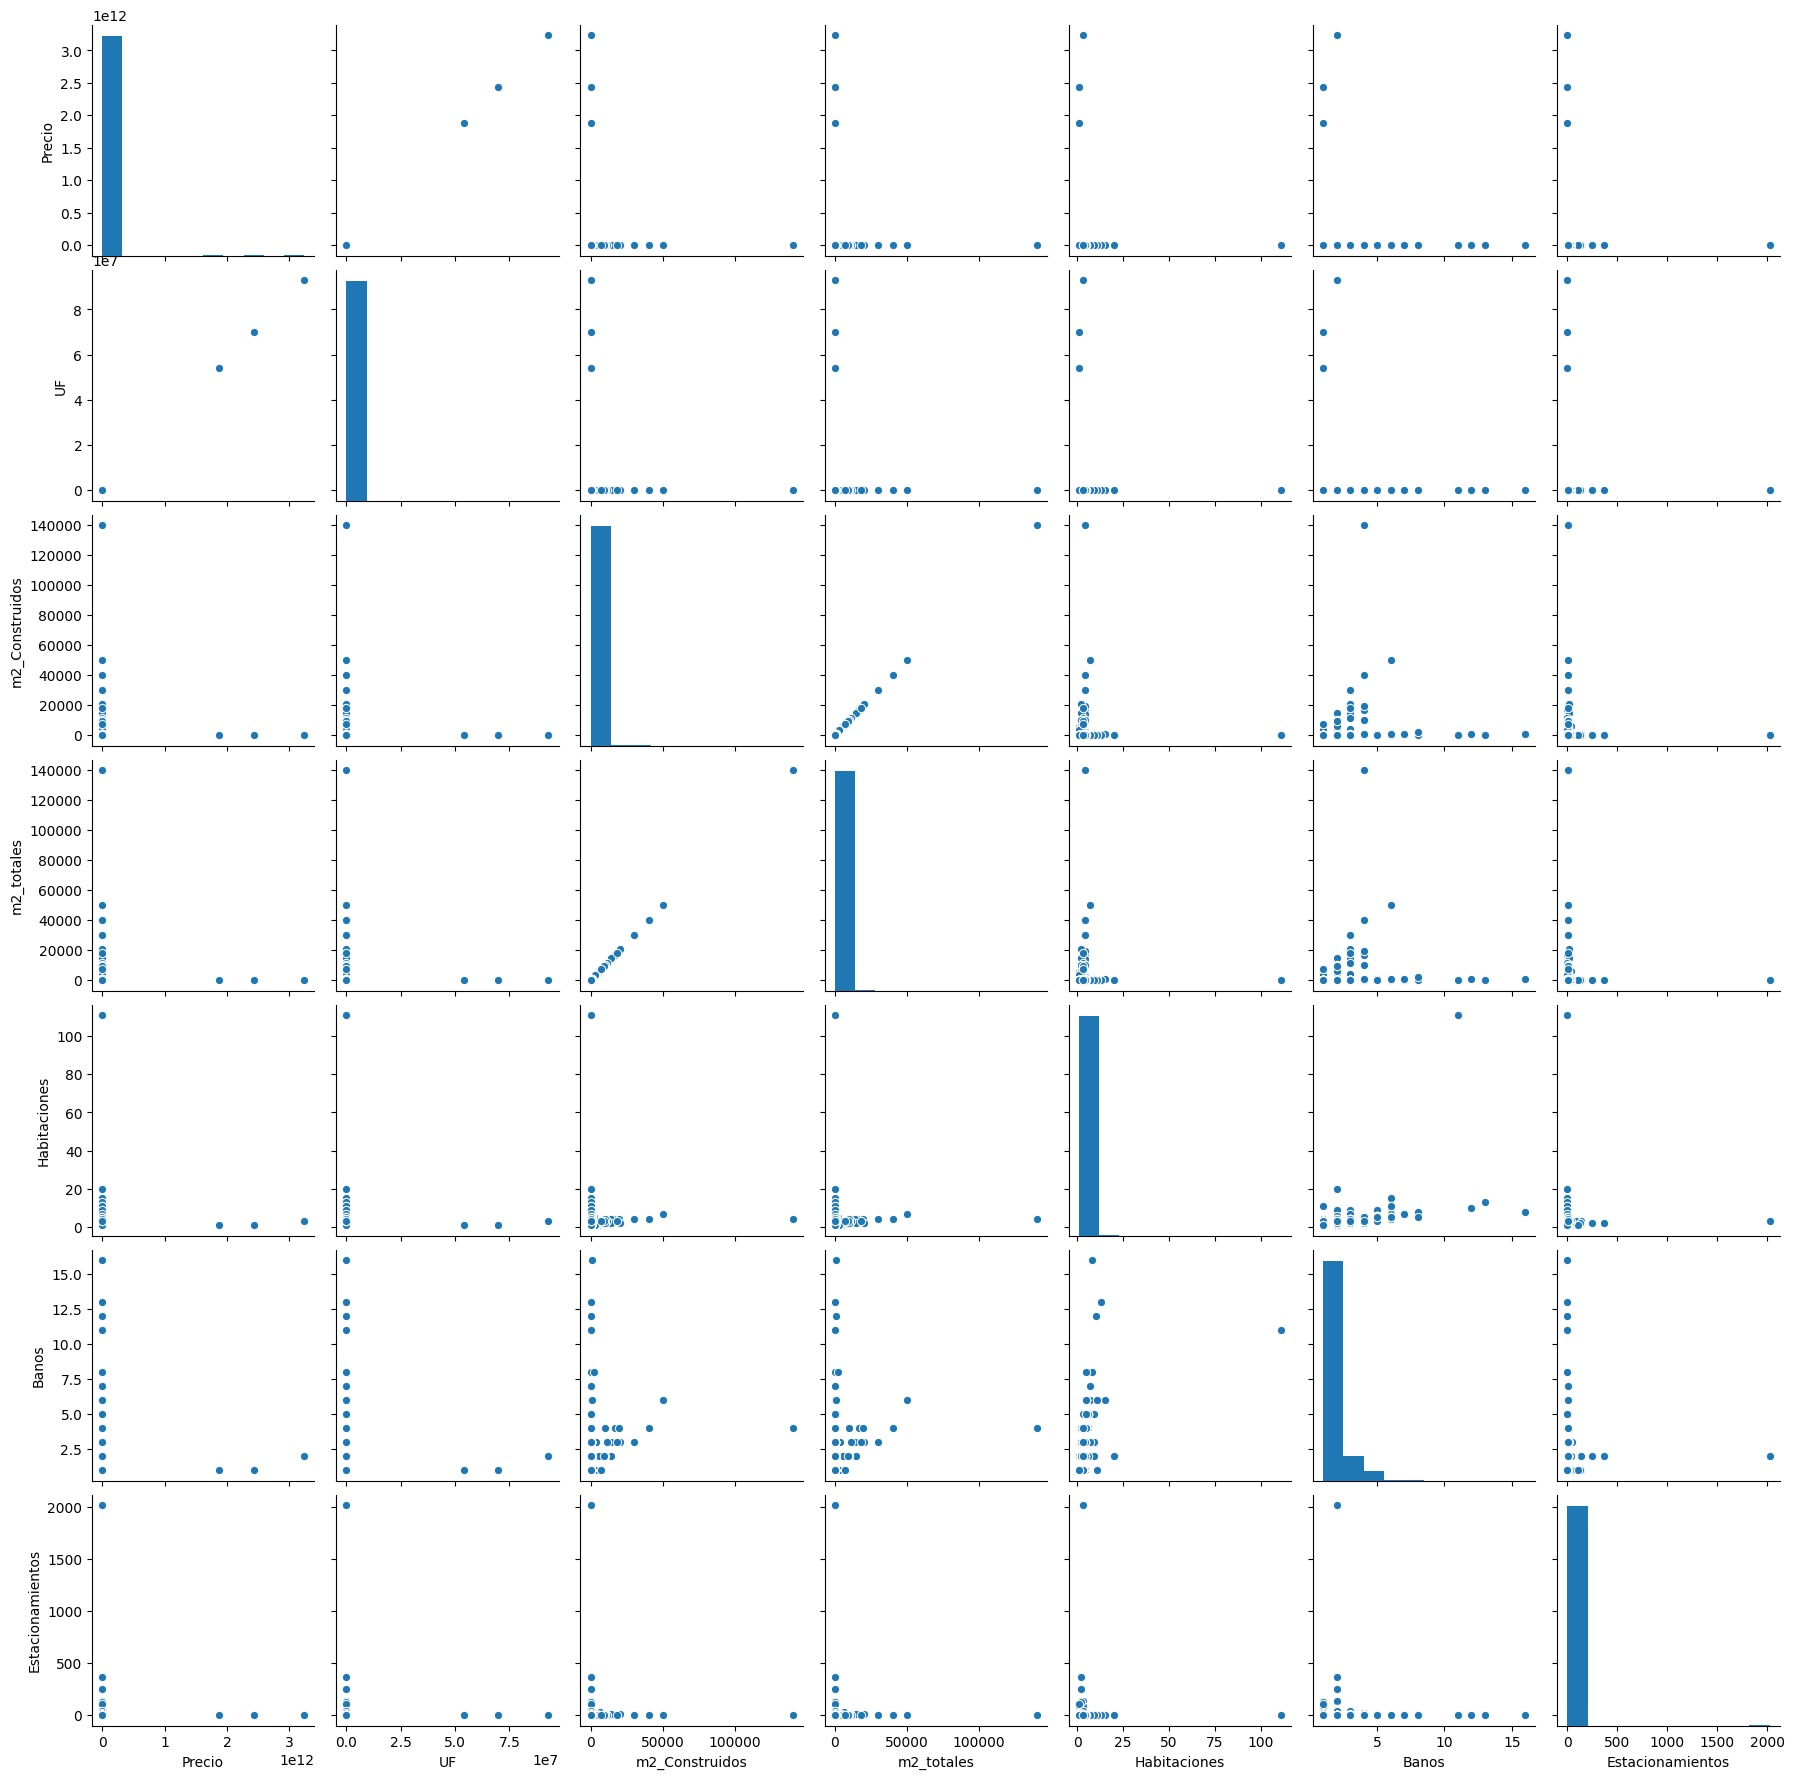

In [9]:
sns.pairplot(df)


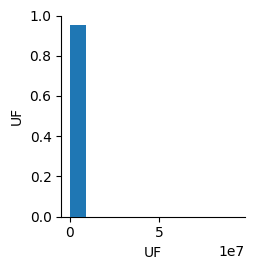

In [562]:
uf= ["UF"]
sns.pairplot(df[uf])

In [32]:
df.describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
Precio,9627.0,968386364.0,4.553368e+10,2390.0,81834050.0,120000000.0,219384900.0,3.238539e+12
UF,9627.0,27809.0,1.307575e+06,0.0,2350.0,3445.0,6300.0,9.300000e+07
m2_Construidos,9627.0,135.0,1.699000e+03,0.0,41.0,56.0,85.0,1.400000e+05
m2_totales,9627.0,135.0,1.699000e+03,0.0,41.0,56.0,85.0,1.400000e+05
Habitaciones,9627.0,2.0,1.000000e+00,1.0,1.0,2.0,3.0,1.110000e+02
Banos,9627.0,2.0,1.000000e+00,1.0,1.0,2.0,2.0,1.600000e+01
Estacionamientos,9627.0,3.0,5.900000e+01,0.0,0.0,0.0,1.0,2.021000e+03


In [33]:
df.max()

Direccion            Ñuñoa, ñuñoa
Precio              3238539000000
UF                       93000000
m2_Construidos             140000
m2_totales                 140000
Habitaciones                  111
Banos                          16
Estacionamientos             2021
Publi                  31/12/2021
dtype: object

## Separar la columna Direccion

In [34]:
df["Direccion"].str.split(",",expand= True)
direc=df["Direccion"].str.split(",",expand= True)
direc.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,San Miguel,Cuarta Avenida 1447,None,None,None,None,None,None,None,None,None,None
1,Estación Central,Avenida Padre Alberto Hurtado,None,None,None,None,None,None,None,None,None,None
2,Independencia,Inglaterra,None,None,None,None,None,None,None,None,None,None
3,San Joaquín,Sta. Rosa 2648,None,None,None,None,None,None,None,None,None,None
4,Las Condes,Fray Luis de León,None,None,None,None,None,None,None,None,None,None
5,La Florida,Rafael Matus,None,None,None,None,None,None,None,None,None,None
6,Ñuñoa,ñuñoa,None,None,None,None,None,None,None,None,None,None
7,Vitacura,Mar jónico,None,None,None,None,None,None,None,None,None,None
8,Peñalolén,El Continente 7445,None,None,None,None,None,None,None,None,None,None
9,Santiago,Nataniel Cox 1439,None,None,None,None,None,None,None,None,None,None


In [35]:
direc.drop(direc.columns[2:12],axis=1, inplace= True)
direc

,0,1
0,San Miguel,Cuarta Avenida 1447
1,Estación Central,Avenida Padre Alberto Hurtado
2,Independencia,Inglaterra
3,San Joaquín,Sta. Rosa 2648
4,Las Condes,Fray Luis de León
...,...,...
9622,Independencia,Gomero
9623,Las Condes,Cristobal colon / felix de amesti
9624,Santiago,Vicuña Mackenna / Metro Irarrázaval (L3 y L5).
9625,Pudahuel,San pablo ag/el salistre


## Vamos a modificar el nombre de las columnas y unirlas a nuestro dataframe

In [36]:
direc= direc.rename(columns={0:"Comuna", 1:"direcc"})
direc

,Comuna,direcc
0,San Miguel,Cuarta Avenida 1447
1,Estación Central,Avenida Padre Alberto Hurtado
2,Independencia,Inglaterra
3,San Joaquín,Sta. Rosa 2648
4,Las Condes,Fray Luis de León
...,...,...
9622,Independencia,Gomero
9623,Las Condes,Cristobal colon / felix de amesti
9624,Santiago,Vicuña Mackenna / Metro Irarrázaval (L3 y L5).
9625,Pudahuel,San pablo ag/el salistre


In [37]:
df=pd.concat([df,direc],axis=1)
df

,Direccion,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,Comuna,direcc
0,"San Miguel, Cuarta Avenida 1447",99245550,2850,49,49,2,1,0,19/12/2022,San Miguel,Cuarta Avenida 1447
1,"Estación Central, Avenida Padre Alberto Hurtado",75000000,2153,62,62,3,2,0,19/12/2022,Estación Central,Avenida Padre Alberto Hurtado
2,"Independencia, Inglaterra",68949540,1980,39,39,2,1,0,19/12/2022,Independencia,Inglaterra
3,"San Joaquín, Sta. Rosa 2648",70342460,2020,46,46,2,1,0,19/12/2022,San Joaquín,Sta. Rosa 2648
4,"Las Condes, Fray Luis de León",971561700,27900,340,340,4,3,3,19/12/2022,Las Condes,Fray Luis de León
...,...,...,...,...,...,...,...,...,...,...,...
9622,"Independencia, Gomero",69646000,2000,70,70,1,1,0,04/12/2022,Independencia,Gomero
9623,"Las Condes, Cristobal colon / felix de amesti",390017600,11200,147,147,4,3,3,04/12/2022,Las Condes,Cristobal colon / felix de amesti
9624,"Santiago, Vicuña Mackenna / Metro Irarrázaval ...",73128300,2100,33,33,1,1,0,04/12/2022,Santiago,Vicuña Mackenna / Metro Irarrázaval (L3 y L5).
9625,"Pudahuel, San pablo ag/el salistre",80000000,2297,65,65,3,2,1,04/12/2022,Pudahuel,San pablo ag/el salistre


In [38]:
df.drop(["Direccion"],axis=1)

,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,Comuna,direcc
0,99245550,2850,49,49,2,1,0,19/12/2022,San Miguel,Cuarta Avenida 1447
1,75000000,2153,62,62,3,2,0,19/12/2022,Estación Central,Avenida Padre Alberto Hurtado
2,68949540,1980,39,39,2,1,0,19/12/2022,Independencia,Inglaterra
3,70342460,2020,46,46,2,1,0,19/12/2022,San Joaquín,Sta. Rosa 2648
4,971561700,27900,340,340,4,3,3,19/12/2022,Las Condes,Fray Luis de León
...,...,...,...,...,...,...,...,...,...,...
9622,69646000,2000,70,70,1,1,0,04/12/2022,Independencia,Gomero
9623,390017600,11200,147,147,4,3,3,04/12/2022,Las Condes,Cristobal colon / felix de amesti
9624,73128300,2100,33,33,1,1,0,04/12/2022,Santiago,Vicuña Mackenna / Metro Irarrázaval (L3 y L5).
9625,80000000,2297,65,65,3,2,1,04/12/2022,Pudahuel,San pablo ag/el salistre


In [39]:
df=df.drop(["Direccion"],axis=1)

In [40]:
df.drop(["direcc"],axis=1)
df=df.drop(["direcc"],axis=1)

In [41]:
#df.to_excel("data/Sucio_pisos.xlsx", index = False)